In [4]:
# -----------------------------
# Task 5: Data Analysis on CSV
# -----------------------------

import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the CSV
df = pd.read_csv("./sample_sales.csv")   # update path if needed

# Display first few rows
df.head()


,date,product,quantity,price
0,2025-01-01,Laptop,2,60000
1,2025-01-02,Laptop,1,60000
2,2025-01-03,Mouse,5,800
3,2025-01-03,Keyboard,3,1500
4,2025-01-04,Mouse,2,800


In [5]:
# 2. Basic Info + Summary

print("Dataset Info:\n")
print(df.info())

print("\nSummary Statistics:\n")
df.describe()


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      5 non-null      object
 1   product   5 non-null      object
 2   quantity  5 non-null      int64 
 3   price     5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 288.0+ bytes
None

Summary Statistics:



,quantity,price
count,5.000000,5.000000
mean,2.600000,24620.000000
std,1.516575,32298.637742
min,1.000000,800.000000
25%,2.000000,800.000000
50%,2.000000,1500.000000
75%,3.000000,60000.000000
max,5.000000,60000.000000


In [10]:
# 3. Total Sales per Product

df["Sales"] = df["quantity"] * df["price"]
sales_per_product = df.groupby("product")["Sales"].sum()
print("Total Sales per Product:\n")
print(sales_per_product)


Total Sales per Product:

product
Keyboard      4500
Laptop      180000
Mouse         5600
Name: Sales, dtype: int64


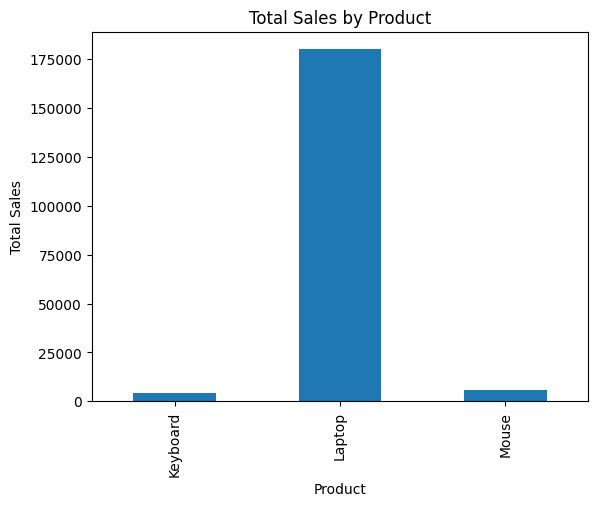

In [11]:
# 4. Plot: Sales per Product

sales_per_product.plot(kind="bar")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.title("Total Sales by Product")
plt.show()


In [13]:
# 5. Monthly Sales Trend
df["date"] = pd.to_datetime(df["date"])
df["Month"] = df["date"].dt.month
df["Month"] = df["date"].dt.strftime("%B")

monthly_sales = df.groupby("Month")["Sales"].sum()
monthly_sales


Month
January    190100
Name: Sales, dtype: int64

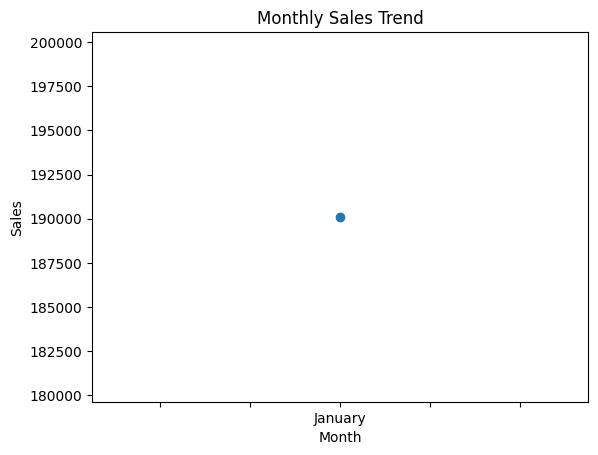

In [14]:
# 6. Plot: Monthly Sales Trend

monthly_sales.plot(kind="line", marker="o")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend")
plt.show()


In [15]:
# 7. Top 3 Best-Selling Products

top_products = sales_per_product.sort_values(ascending=False).head(3)
top_products


product
Laptop      180000
Mouse         5600
Keyboard      4500
Name: Sales, dtype: int64